# This notebook is used to plot curvefit for the playfight data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_rel,wilcoxon
import os

In [2]:
path_to_add = os.path.abspath('../')
path_to_add

'/Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code'

In [3]:
sys.path.append(path_to_add)
from func_curvefit import *
import seaborn as sns

In [4]:
root_data_file = '../../data/playfight_data'

In [74]:
## import dataframes (curvefit)
df_params_test = pd.read_csv(f'{root_data_file}/curve_fit_pf_ses1_linear/all_params_1k_play_linear.csv')
df_params_retest = pd.read_csv(f'{root_data_file}/curve_fit_pf_ses2_linear/all_params_1k_play_linear.csv')
df_params_test.shape, df_params_retest.shape

((319, 12), (269, 12))

In [75]:
## merging the two curvefit params dataframe
df_params_merge = df_params_test.merge(df_params_retest, on = 'subID', suffixes = ('_ses1', '_ses2'))
df_params_merge

,subID,r_squared_ses1,nrmse_ses1,aic_ses1,obj_center_ses1,slope_ses1,intercept_ses1,bias_xmin_ses1,bias_xmax_ses1,bias_lower_ses1,...,nrmse_ses2,aic_ses2,obj_center_ses2,slope_ses2,intercept_ses2,bias_xmin_ses2,bias_xmax_ses2,bias_lower_ses2,bias_upper_ses2,flipped_ses2
0,26000.0,0.940373,0.089823,-35.492508,0.290396,0.709500,0.293964,0.293964,-0.003464,0.0,...,0.114475,-39.241819,0.124705,0.477381,0.440468,0.440468,0.082151,0.0,0.0,False
1,26001.0,0.823224,0.147384,-35.444795,0.405999,0.386857,0.342937,0.342937,0.270206,0.0,...,0.140828,-30.664804,0.495616,0.521357,0.241607,0.241607,0.237036,0.0,0.0,False
2,26003.0,0.915302,0.110593,-26.826571,0.485000,1.000000,0.015000,0.015000,-0.015000,0.0,...,0.087003,-31.126282,0.507930,0.984191,0.000100,0.000100,0.015709,0.0,0.0,False
3,26004.0,0.972040,0.051894,-43.866039,0.473363,0.579214,0.225821,0.225821,0.194964,0.0,...,0.130596,-45.074530,0.202595,0.214714,0.456500,0.456500,0.328786,0.0,0.0,False
4,26005.0,0.936739,0.089287,-38.116158,0.579699,0.570000,0.169571,0.169571,0.260429,0.0,...,0.053982,-40.003157,0.369992,0.870643,0.177869,0.177869,-0.048512,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,26343.0,0.881986,0.130820,-32.029021,0.398139,0.625500,0.250964,0.250964,0.123536,0.0,...,0.080978,-35.254970,0.427334,0.676286,0.211000,0.211000,0.112714,0.0,0.0,False
258,26344.0,0.868675,0.141112,-25.061996,0.376172,0.967929,0.135893,0.135893,-0.103821,0.0,...,0.094923,-31.778106,0.358499,0.895500,0.178964,0.178964,-0.074464,0.0,0.0,False
259,26346.0,0.855388,0.122336,-30.751435,0.488752,0.609643,0.202036,0.202036,0.188321,0.0,...,0.083382,-39.407191,0.546918,0.523714,0.213571,0.213571,0.262714,0.0,0.0,False
260,26347.0,0.852070,0.125535,-43.857648,0.175750,0.235905,0.458540,0.458540,0.305556,0.0,...,0.085602,-47.646641,0.273320,0.282476,0.422794,0.422794,0.294730,0.0,0.0,False


In [76]:
print('before:',df_params_merge.shape)
df_params_merge.dropna(inplace=True)
df_params_merge.shape

before: (262, 23)


(252, 23)

In [77]:
## import raw dataframes (rating)
df_data_test = pd.read_csv(f'{root_data_file}/final_data_triallevel_sorted_ses1.csv')
df_data_retest = pd.read_csv(f'{root_data_file}/final_data_triallevel_sorted_ses2.csv')

## Plotting all results: curves & ratings from ses 1 and ses 2

In [78]:
rootfile_results = '../../results/playfight/refit_across_sessions'

In [79]:
# filter behavioral scores
df_data_ses1 = df_data_test.loc[:, df_data_test.columns != 'stim_file']
df_data_ses2 = df_data_retest.loc[:, df_data_retest.columns != 'stim_file']

## preprocess the dataframe
df_data_ses1 = df_data_test.loc[:, df_data_test.columns != 'stim_file']
# df_data_ses1 = df_data_ses1.drop(['condition'], axis=1)
df_data_ses1 = df_data_ses1.groupby(['subID','chargeSpeeds']).mean().reset_index()

df_data_ses2 = df_data_retest.loc[:, df_data_retest.columns != 'stim_file']
# df_data_ses2 = df_data_ses2.drop(['condition'], axis=1)
df_data_ses2 = df_data_ses2.groupby(['subID','chargeSpeeds']).mean().reset_index()

In [80]:
## merging the two rating df 
df_rating_merge = df_data_ses1.merge(df_data_ses2, on=['subID', 'chargeSpeeds'], suffixes = ('_ses1', '_ses2'))
df_rating_merge.head()

,subID,chargeSpeeds,Unnamed: 0_ses1,stimset_rows_ses1,stim_dur_ses1,responses_ses1,RT_ses1,trial_num_ses1,Unnamed: 0_ses2,stimset_rows_ses2,stim_dur_ses2,responses_ses2,RT_ses2,trial_num_ses2
0,26000,1.50,30.9,266.0,7718.3,3.5,2.061,30.9,36.6,NaN,7944.6,13.100000,2.470000,36.6
1,26000,2.75,25.9,266.0,7716.7,11.1,1.768,25.9,23.7,NaN,7948.5,13.333333,2.392222,23.7
2,26000,4.00,30.8,266.0,7716.3,25.8,1.914,30.8,24.6,NaN,7937.2,15.555556,3.117778,24.6
3,26000,5.25,41.1,266.0,7693.9,22.8,2.018,41.1,32.5,NaN,7942.2,35.300000,2.474000,32.5
4,26000,6.50,34.3,266.0,7700.8,45.6,1.680,34.3,41.7,NaN,7912.9,43.200000,2.162000,41.7


In [81]:
df_rating_merge.shape

(1834, 14)

## Fitting own data from one session to another

In [82]:
df_params_merge

,subID,r_squared_ses1,nrmse_ses1,aic_ses1,obj_center_ses1,slope_ses1,intercept_ses1,bias_xmin_ses1,bias_xmax_ses1,bias_lower_ses1,...,nrmse_ses2,aic_ses2,obj_center_ses2,slope_ses2,intercept_ses2,bias_xmin_ses2,bias_xmax_ses2,bias_lower_ses2,bias_upper_ses2,flipped_ses2
0,26000.0,0.940373,0.089823,-35.492508,0.290396,0.709500,0.293964,0.293964,-0.003464,0.0,...,0.114475,-39.241819,0.124705,0.477381,0.440468,0.440468,0.082151,0.0,0.0,False
1,26001.0,0.823224,0.147384,-35.444795,0.405999,0.386857,0.342937,0.342937,0.270206,0.0,...,0.140828,-30.664804,0.495616,0.521357,0.241607,0.241607,0.237036,0.0,0.0,False
2,26003.0,0.915302,0.110593,-26.826571,0.485000,1.000000,0.015000,0.015000,-0.015000,0.0,...,0.087003,-31.126282,0.507930,0.984191,0.000100,0.000100,0.015709,0.0,0.0,False
3,26004.0,0.972040,0.051894,-43.866039,0.473363,0.579214,0.225821,0.225821,0.194964,0.0,...,0.130596,-45.074530,0.202595,0.214714,0.456500,0.456500,0.328786,0.0,0.0,False
4,26005.0,0.936739,0.089287,-38.116158,0.579699,0.570000,0.169571,0.169571,0.260429,0.0,...,0.053982,-40.003157,0.369992,0.870643,0.177869,0.177869,-0.048512,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,26343.0,0.881986,0.130820,-32.029021,0.398139,0.625500,0.250964,0.250964,0.123536,0.0,...,0.080978,-35.254970,0.427334,0.676286,0.211000,0.211000,0.112714,0.0,0.0,False
258,26344.0,0.868675,0.141112,-25.061996,0.376172,0.967929,0.135893,0.135893,-0.103821,0.0,...,0.094923,-31.778106,0.358499,0.895500,0.178964,0.178964,-0.074464,0.0,0.0,False
259,26346.0,0.855388,0.122336,-30.751435,0.488752,0.609643,0.202036,0.202036,0.188321,0.0,...,0.083382,-39.407191,0.546918,0.523714,0.213571,0.213571,0.262714,0.0,0.0,False
260,26347.0,0.852070,0.125535,-43.857648,0.175750,0.235905,0.458540,0.458540,0.305556,0.0,...,0.085602,-47.646641,0.273320,0.282476,0.422794,0.422794,0.294730,0.0,0.0,False


In [83]:
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [86]:
# function that plots refit graph for self
def plot_refit_curvefit_self(nrows, ncols, df_params, df_rating, param_ses, rating_ses, flname,title):#, r2_list, rmse_list):
    # arguments: 
    # nrow,ncol - nr of rows and columns in the plot
    # df_params, df_rating: curve fit param and raw data dataframes
    # param_ses: train session, rating_ses: test ses
    # flname: full filename to save results in
    # ((not there anymore: r2_list, rmse_list - empty lists to store r1 and rmse in))
    # ((returning: nothing. the r2 and rmse lists update outside the function automatically))
    # returning: dataframe with subID, r2 and rmse

    r2_list = []
    rmse_list = []
    subID_all = []
    fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*2,nrows*2.1), sharey=True,sharex=True)#(20, 70))
    
    # for isub in range(350):
    for isub,subID in enumerate(df_params_merge['subID']):
        # print(isub,subID)
        # ax = plt.subplot(nrows, ncols, isub)
        r = int(np.floor(isub/ncols))
        c = isub%ncols
        ax = axs[r,c]
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)

        # subID =  isub+1

        if isub%50 == 0:
            print('subID=',subID)

        # try:
        # behavior
        xfit = 1-(df_rating.loc[df_rating['subID'] ==subID, 'chargeSpeeds'].values-1.5) / 7.5
        yfit = (100-df_rating.loc[df_rating['subID'] == subID, f'responses_ses{rating_ses}'].values)/100 #for playfulness
        
        # print(xfit)
        x = np.array(xfit)
        y = np.array(yfit)

        # print(xfit,yfit)

        # Plot behavioral dots
        ax.plot(x, y, '.', alpha=0.5, color='black')

        intercept = df_params_merge.loc[df_params_merge['subID'] == subID, f'intercept_ses{param_ses}'].values #f'bias_xmin_ses{param_ses}'].values
        slope = df_params_merge.loc[df_params_merge['subID'] == subID, f'slope_ses{param_ses}'].values #f'bias_xmin_ses{param_ses}'].values
        # center = df_params_merge.loc[df_params_merge['subID'] == subID, f'center_ses{param_ses}'].values
        # sigma = df_params_merge.loc[df_params_merge['subID'] == subID, f'sigma_ses{param_ses}'].values
        # bias_upper = df_params_merge.loc[df_params_merge['subID'] == subID, f'bias_xmax_ses{param_ses}'].values

        # amplitude = 1 - intercept - bias_upper
        x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        # y_values = intercept + amplitude * sigmoid(x_values, sigma, center)
        y_values = linear(x_values, slope, intercept)

        # Plot the curves
        ax.plot(x_values, y_values, '-', color='tab:red')

        # Calculate the r_squared and rmse
        y_pred = linear(x, slope, intercept) #intercept + amplitude * sigmoid(x, sigma, center)
        r_sq = r_squared(y, y_pred)
        rmse = normalized_error(y, y_pred)

        r2_list.append(r_sq)
        rmse_list.append(rmse)
        subID_all.append(subID)

        if rmse <= 0.2:
            color = 'k'
        else:
            color = 'r'
        ax.set_title(f'Subject {subID}')
        ax.annotate("r_2: %.2f" % r_sq, xy=(1, 0.2), xycoords ='axes fraction', color=color,ha='right')
        ax.annotate("rmse: %.2f" % rmse, xy=(1, 0), xycoords ='axes fraction', color=color,ha='right')

        # except:
        #     print('isub, error!')
        #     plt.delaxes(ax)  
        #     r2_list.append(np.nan) # to keep list the same length as df
        #     rmse_list.append(np.nan)
        #     subID_all.append(subID)      
        
        ax.set_xticks([0,1],['9','1.5'])
    
        # break

    for isub in np.arange(df_params_merge.shape[0],nrows*ncols):
        ax =  plt.subplot(nrows, ncols, isub + 1)
        plt.delaxes(ax)  

    plt.suptitle(title, fontweight='bold',fontsize=24)
    plt.tight_layout() 
    plt.subplots_adjust(wspace=0.5, hspace=0.5) 
    plt.savefig(flname, facecolor='w')
    plt.clf()
    
    df = pd.DataFrame({'subID':subID_all,'R2':r2_list, 'RMSE': rmse_list})
    
    return df

In [87]:
df_params_merge.shape

(252, 23)

In [88]:
df_params_merge.loc[np.isnan(df_params_merge['intercept_ses1']),:]

,subID,r_squared_ses1,nrmse_ses1,aic_ses1,obj_center_ses1,slope_ses1,intercept_ses1,bias_xmin_ses1,bias_xmax_ses1,bias_lower_ses1,...,nrmse_ses2,aic_ses2,obj_center_ses2,slope_ses2,intercept_ses2,bias_xmin_ses2,bias_xmax_ses2,bias_lower_ses2,bias_upper_ses2,flipped_ses2


In [89]:
df_params_merge.loc[np.isnan(df_params_merge['intercept_ses2']),:]

,subID,r_squared_ses1,nrmse_ses1,aic_ses1,obj_center_ses1,slope_ses1,intercept_ses1,bias_xmin_ses1,bias_xmax_ses1,bias_lower_ses1,...,nrmse_ses2,aic_ses2,obj_center_ses2,slope_ses2,intercept_ses2,bias_xmin_ses2,bias_xmax_ses2,bias_lower_ses2,bias_upper_ses2,flipped_ses2


In [90]:
df_params_merge.dropna().shape

(252, 23)

In [91]:
df_params_merge.dropna(inplace=True)
df_params_merge.shape

(252, 23)

In [92]:
nrows, ncols = 14, 20

In [93]:
self_fit_ses1

,subID,R2,RMSE
0,26000.0,0.940373,0.089823
1,26001.0,0.823224,0.147384
2,26003.0,0.915302,0.110593
3,26004.0,0.972040,0.051894
4,26005.0,0.936739,0.089287
...,...,...,...
257,26343.0,0.881986,0.130820
258,26344.0,0.868675,0.141112
259,26346.0,0.855388,0.122336
260,26347.0,0.852070,0.125535


In [94]:
# Fitting ses 1 (curvefit param) to ses 1 (behavioral rating)
# self_r_sqaure_ses1_t_ses1 = []
# self_rmse_ses1_t_ses1 = []
title = 'ses1_to_ses1'
flname = f'{rootfile_results}/sublevel/{title}_sublevel.png'
self_fit_ses1 = plot_refit_curvefit_self(nrows, ncols, df_params_merge, df_rating_merge,
                    1, 1,flname,title)#, self_r_sqaure_ses1_t_ses1, self_rmse_ses1_t_ses1)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 2880x2116.8 with 0 Axes>

In [95]:
# Fitting ses 2  (curvefit param) to ses 2 (behavioral rating)
# self_r_sqaure_ses2_t_ses2 = []
# self_rmse_ses2_t_ses2 = []
title = 'ses2_to_ses2' 
flname = f'{rootfile_results}/sublevel/{title}_sublevel.png'
self_fit_ses2 = plot_refit_curvefit_self(nrows, ncols, df_params_merge, df_rating_merge,
                    2, 2, flname,title) #self_r_sqaure_ses2_t_ses2, self_rmse_ses2_t_ses2)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 2880x2116.8 with 0 Axes>

In [96]:
# Fitting ses 1 (curvefit param) to ses 2 (behavioral rating)
# self_r_sqaure_ses1_t_ses2 = []
# self_rmse_ses1_t_ses2 = []
title = 'ses1_to_ses2' 
flname = f'{rootfile_results}/sublevel/{title}_sublevel.png'
cross_fit_ses1to2 = plot_refit_curvefit_self(nrows, ncols, df_params_merge, df_rating_merge,
                    1, 2,flname,title) #, self_r_sqaure_ses1_t_ses2, self_rmse_ses1_t_ses2)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 2880x2116.8 with 0 Axes>

In [97]:
# Fitting ses 2 (curvefit param) to ses 1 (behavioral rating)
# self_r_sqaure_ses2_t_ses1 = []
# self_rmse_ses2_t_ses1 = []
title = 'ses2_to_ses1'
flname = f'{rootfile_results}/sublevel/{title}_sublevel.png'
cross_fit_ses2to1 = plot_refit_curvefit_self(nrows, ncols, df_params_merge, df_rating_merge,
                    2, 1, flname,title)#, self_r_sqaure_ses2_t_ses1, self_rmse_ses2_t_ses1)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 2880x2116.8 with 0 Axes>

## Fitting mean of all other participants to self

In [114]:
## fit the mean to self
def plot_refit_curvefit_mean(nrows, ncols, df_params, df_rating, param_ses, rating_ses, flname, title):#, r2_list, rmse_list):
    # compares each sub's true data (test) to mean data from another session excluding that sub(train)
    
    # arguments: 
    # nrow,ncol - nr of rows and columns in the plot
    # df_params, df_rating: curve fit param and raw data dataframes
    # param_ses: train session, rating_ses: test ses
    # flname: full filename to save results in
    # ((not there anymore: r2_list, rmse_list - empty lists to store r1 and rmse in))
    # ((returning: nothing. the r2 and rmse lists update outside the function automatically))
    # returning: dataframe with subID, r2 and rmse

    subID_all = []
    r2_list = []
    rmse_list = []

    # plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 70))
    fig,axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3.25,nrows*3), sharey=True,sharex=True)#(20, 70))
    
    for isub,subID in enumerate(df_params_merge['subID']):
    # for isub in range(350):
        r = int(np.floor(isub/ncols))
        c = isub%ncols
        ax = axs[r,c]
        # ax = plt.subplot(nrow, ncol, isub + 1)
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)

        if isub%50==0:
            print('subID=',subID)

        # try:
        # behavior
        xfit = 1-(df_rating.loc[df_rating['subID'] ==subID, 'chargeSpeeds'].values-1.5) / 7.5
        yfit = (100-df_rating.loc[df_rating['subID'] == subID, f'responses_ses{rating_ses}'].values)/100 #for playfulness
         
        x = np.array(xfit)
        y = np.array(yfit)

        # Plot behavioral dots
        ax.plot(x, y, '.', alpha=0.5, color='black')

        df_temp = df_params_merge[df_params_merge['subID'] != subID].copy() # exclude current sub
        # other_mean: curve fit
        param_mean = df_temp.mean()

        intercept = param_mean[f'intercept_ses{param_ses}'] #df_params_merge.loc[df_params_merge['subID'] == subID, f'intercept_ses{param_ses}'].values #f'bias_xmin_ses{param_ses}'].values
        slope = param_mean[f'slope_ses{param_ses}'] #df_params_merge.loc[df_params_merge['subID'] == subID, f'slope_ses{param_ses}'].values #f'bias_xmin_ses{param_ses}'].values
        # intercept = param_mean[f'bias_xmin_ses{param_ses}']
        # center = param_mean[f'center_ses{param_ses}']
        # sigma = param_mean[f'sigma_ses{param_ses}']
        # bias_upper = param_mean[f'bias_xmax_ses{param_ses}']
        # amplitude = 1 - intercept - bias_upper
    
        x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        y_values = linear(x_values, slope, intercept)
        # Plot the curves
        ax.plot(x_values, y_values, '-', color='tab:red')

        # Calculate the r_squared and rmse
        y_pred = linear(x, slope, intercept) #intercept + amplitude * sigmoid(x, sigma, center)
        r_sq = r_squared(y, y_pred)
        rmse = normalized_error(y, y_pred)

        r2_list.append(r_sq)
        rmse_list.append(rmse)
        subID_all.append(subID)

        if rmse <= 0.2:
            color = 'k'
        else:
            color = 'r'

        ax.set_title(f'Subject {subID}')
        ax.annotate("r_2: %.2f" % r_sq, xy=(1, 0.2), xycoords ='axes fraction', color=color,ha='right')
        ax.annotate("rmse: %.2f" % rmse, xy=(1, 0), xycoords ='axes fraction', color=color,ha='right')

        # except:
        #     plt.delaxes(ax)  
        #     r2_list.append(np.nan) # to keep list the same length as df
        #     rmse_list.append(np.nan)

    ax.set_xticks([0,1],['180','0'])
    ax.set_yticks([0,0.5,1])
   
    for isub in np.arange(df_params_merge.shape[0],nrows*ncols):
        ax =  plt.subplot(nrows, ncols, isub + 1)
        plt.delaxes(ax)  

    plt.suptitle(title, fontweight='bold',fontsize=24)
    plt.tight_layout() 
    # plt.subplots_adjust(wspace=0.5, hspace=0.5) 
    plt.savefig(flname, facecolor='w')
    plt.clf()

    df = pd.DataFrame({'subID':subID_all,'R2':r2_list, 'RMSE': rmse_list})
    
    return df

In [117]:
# fit mean to self: ses 1 mean (curvit) to ses 1 self(rating)
# mean_r_sqaure_ses1_t_ses1 = []
# mean_rmse_ses1_t_ses1 = []
title = 'ses1mean_to_ses1'
flname = f'{rootfile_results}/mean/{title}_mean.png'
self_fit_mean_ses1 = plot_refit_curvefit_mean(nrows, ncols, df_params_merge, df_rating_merge,
                    1, 1,flname,title)#, mean_r_sqaure_ses1_t_ses1, mean_rmse_ses1_t_ses1)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 4680x3024 with 0 Axes>

In [118]:
# fit mean to self: ses 1 mean (curvefit) to ses 2 self(rating)
# nrow, ncol = 35, 10
# mean_r_sqaure_ses1_t_ses2 = []
# mean_rmse_ses1_t_ses2 = []
title = 'ses1mean_to_ses2'
flname = f'{rootfile_results}/mean/{title}_mean.png'
cross_fit_mean_ses1_to_ses2 = plot_refit_curvefit_mean(nrows, ncols, df_params_merge, df_rating_merge,
                    1, 2,flname,title)#, mean_r_sqaure_ses1_t_ses2, mean_rmse_ses1_t_ses2)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 4680x3024 with 0 Axes>

In [119]:
# fit mean to self: ses 2 mean (curvefit) to ses 2 self(rating)
# mean_r_sqaure_ses2_t_ses2 = []
# mean_rmse_ses2_t_ses2 = []
title = 'ses2mean_to_ses2'
flname = f'{rootfile_results}/mean/{title}_mean.png'
self_fit_mean_ses2 = plot_refit_curvefit_mean(nrows, ncols, df_params_merge, df_rating_merge,
                    2, 2,flname,title)#, mean_r_sqaure_ses2_t_ses2, mean_rmse_ses2_t_ses2)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 4680x3024 with 0 Axes>

In [120]:
# fit mean to self: ses 2 mean (curvefit) to ses 1 self(rating)
# mean_r_sqaure_ses2_t_ses1 = []
# mean_rmse_ses2_t_ses1 = []
title = 'ses2mean_to_ses1'
flname = f'{rootfile_results}/mean/{title}_mean.png'
cross_fit_mean_ses2_to_ses1 =cross_fit_mean_ses2_to_ses1 =plot_refit_curvefit_mean(nrows, ncols, df_params_merge, df_rating_merge,
                    2, 1,flname,title)# mean_r_sqaure_ses2_t_ses1, mean_rmse_ses2_t_ses1)

subID= 26000.0
subID= 26079.0
subID= 26137.0
subID= 26215.0
subID= 26280.0
subID= 26347.0


<Figure size 4680x3024 with 0 Axes>

## Fitting other's individual to self

In [121]:
df_other_fit = df_params_merge.copy()
df_other_fit = df_other_fit.dropna()

In [122]:
# def plot_refit_curvefit_other(df_params, df_rating, param_ses, rating_ses, r2_list, rmse_list):
#     for idxsub in range(len(df_params['subID'].values)): # test data (row); mean ratings
#         isub = df_params['subID'].values[idxsub]
#         try:
#             xfit = (180 - df_rating.loc[df_rating['subID'] == (isub), 'subtlety'].values) / 180
#             yfit = df_rating.loc[df_rating['subID'] == (isub), f'slider_ses{rating_ses}'].values / 100

#             x = np.array(xfit)
#             y = np.array(yfit)

#             for idxsub2 in range(len(df_params['subID'].values)): # train data (curve fit params)
#                 other = df_params['subID'].values[idxsub2]
#                 if isub != other: # added by RV
#                     df_temp = df_params[df_params['subID'] == other]
                    
#                     intercept = df_temp[f'bias_xmin_ses{param_ses}'].values
#                     center = df_temp[f'center_ses{param_ses}'].values
#                     sigma = df_temp[f'sigma_ses{param_ses}'].values
#                     bias_upper = df_temp[f'bias_xmax_ses{param_ses}'].values
#                     amplitude = 1 - intercept - bias_upper
                
#                     x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
#                     y_pred = intercept + amplitude * sigmoid(x, sigma, center)
                    
#                     ## calculate the r_squared
#                     r2_list[idxsub, idxsub2] = r_squared(y, y_pred)
#                     rmse_list[idxsub, idxsub2] = normalized_error(y, y_pred)
#         except:
#             continue
#     plt.imshow(rmse_list, cmap='Blues', vmin=0, vmax=1)
#     plt.title(f'Fitting self vs other (ses {param_ses} to ses {rating_ses})')
#     plt.colorbar()

In [123]:
# # using others to fit self: other ses 1(curvefit) to self ses 1(rating)
# # other_R2_ses1_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# # other_rmse_ses1_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# other_R2_ses1_t_ses1 = np.zeros((len(df_params_merge['subID'].values),len(df_params_merge['subID'].values))) * np.nan
# other_rmse_ses1_t_ses1 = np.zeros((len(df_params_merge['subID'].values),len(df_params_merge['subID'].values))) * np.nan
# plot_refit_curvefit_other(df_params_merge, df_rating_merge, 1, 1, other_R2_ses1_t_ses1, other_rmse_ses1_t_ses1)

In [124]:
# # using others to fit self: other ses 1(curvefit) to self ses 2(rating)
# other_r_sqaure_ses1_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# other_rmse_ses1_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# plot_refit_curvefit_other(df_other_fit, df_rating_merge, 1, 2, other_r_sqaure_ses1_t_ses2, other_rmse_ses1_t_ses2)

In [125]:
# # using others to fit self: other ses 2(curvefit) to self ses 2(rating)
# other_r_sqaure_ses2_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# other_rmse_ses2_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# plot_refit_curvefit_other(df_other_fit, df_rating_merge, 2, 2, other_r_sqaure_ses2_t_ses2, other_rmse_ses2_t_ses2)

In [126]:
# # using others to fit self: other ses 2(curvefit) to self ses 1(rating)
# other_r_sqaure_ses2_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# other_rmse_ses2_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
# plot_refit_curvefit_other(df_other_fit, df_rating_merge, 2, 1, other_r_sqaure_ses2_t_ses1, other_rmse_ses2_t_ses1)

## compare the rmse between conditions

In [181]:
def get_other_param(other, operation):
    operations = {
        'mean': lambda x: np.nanmean(x),
        'median': lambda x: np.nanmedian(x),
        'min': lambda x: np.nanmin(x)
    }
    result = [operations[operation](sublist) for sublist in other] # mean, median or min rmse from each row (when fitted using every other sub (column) in the array)
    return result


# def plot_rmse_dist(self, mean, other, ses_to_ses):
#     params = ['other_ind_mean', 'other_ind_median', 'other_ind_min']
#     df_bootstrap = pd.DataFrame()
#     df_bootstrap['self'] =[x for x in self if not np.isnan(x)]
#     df_bootstrap['mean'] = [x for x in mean if not np.isnan(x)]
#     df_bootstrap[params[0]] = get_other_param(other, 'mean')
#     df_bootstrap[params[1]] = get_other_param(other, 'median')
#     df_bootstrap[params[2]] = get_other_param(other, 'min')

#     for param in params: #  ['other_ind_mean', 'other_ind_median', 'other_ind_min']
#         plt.figure(figsize=(8, 6))
#         data_list = [df_bootstrap['self'], df_bootstrap['mean'], df_bootstrap[param]]
#         positions = [1, 2, 3]  
#         plt.violinplot(data_list, positions=positions, showmeans=True)

#         t_statistic_1, p_value_1 = ttest_rel(df_bootstrap['self'], df_bootstrap[param])
#         t_statistic_2, p_value_2 = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
#         t_statistic_3, p_value_3 = ttest_rel(df_bootstrap['mean'], df_bootstrap[param])
#         plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs mean vs {param}')
#         plt.xticks(positions, ['self_rmse', 'mean', f'{param}'])
#         print(f'Self v {param} - Paired t-test : t = {t_statistic_1:.2f}, p-value = {p_value_1:.2f}')
#         print(f'Self v mean - Paired t-test: t = {t_statistic_2:.2f}, p-value = {p_value_2:.2f}')
#         print(f'mean v {param} - Paired t-test: t = {t_statistic_3:.2f}, p-value = {p_value_3:.2f}')
#         plt.ylim(0, 2)
#         plt.show()
def get_p(p):
    if p < .001:
        return "p < .001"
    elif p < .01:
        return f"p={p:.3f}"
    else:
        return f"p={p:.2f}"

def plot_rmse_dist_reduced(self, mean, flname, ses_to_ses):
    # params = ['other_ind_mean', 'other_ind_median', 'other_ind_min']
    df_bootstrap = pd.DataFrame()
    df_bootstrap['self'] =[x for x in self if not np.isnan(x)]
    df_bootstrap['mean'] = [x for x in mean if not np.isnan(x)]
    # df_bootstrap[params[0]] = get_other_param(other, 'mean')
    # df_bootstrap[params[1]] = get_other_param(other, 'median')
    # df_bootstrap[params[2]] = get_other_param(other, 'min')

    # for param in params: #  ['other_ind_mean', 'other_ind_median', 'other_ind_min']
    plt.figure(figsize=(5, 8))
    data_list = [df_bootstrap['self'], df_bootstrap['mean']]
    positions = [0,1]  
    # widths = .8
    # boxprops = dict(color='k', linewidth=2)
    # medianprops = dict(color='k', linewidth=2, marker=None, markerfacecolor='k')
    # plt.boxplot(data_list, positions=positions,boxprops=boxprops,medianprops=medianprops,widths=widths)#, showmeans=True)
    

    parts = plt.violinplot(data_list, positions=positions, showmeans=True)
    print(parts['bodies'])

    # Customize the body color
    for i,pc in enumerate(parts['bodies']):
        pc.set_facecolor('tab:red')
        pc.set_edgecolor('tab:red')
        pc.set_alpha(0.5)

        # Get the paths and modify them to only show a half
        if i ==0:
            path = pc.get_paths()[0]
            vertices = path.vertices
            vertices[:, 0] = np.clip(vertices[:, 0], -np.inf,0)
        else:
            path = pc.get_paths()[0]
            vertices = path.vertices
            vertices[:, 0] = np.clip(vertices[:, 0], 1,np.inf)

    

    # Customize the median line color
    # parts['cmedians'].set_edgecolor('k')

    # Customize the mean line color
    parts['cmeans'].set_edgecolor('k')

    # Customize the minimum and maximum lines color
    parts['cmins'].set_edgecolor('k')
    parts['cmaxes'].set_edgecolor('k')

    for line in ['cbars', 'cmins', 'cmaxes']:
        if line in parts:
            parts[line].set_edgecolor('tab:red')
    
    plt.plot(data_list,color = 'grey',alpha=.1)

    t_statistic, p_value = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
    stat_wilc, p_wilc = wilcoxon(df_bootstrap['self'], df_bootstrap['mean'])
    MD = (df_bootstrap['self'] - df_bootstrap['mean']).mean()
    txt = f'MD={MD:.2f}\n(t-test:{get_p(p_value)},\nwilc.:{get_p(p_wilc)})'
    plt.gca().annotate(txt, xy=(0.05,.95),ha='left',va='top',xycoords='axes fraction')
    
    # t_statistic_1, p_value_1 = ttest_rel(df_bootstrap['self'], df_bootstrap[param])
    # t_statistic_2, p_value_2 = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
    # t_statistic_3, p_value_3 = ttest_rel(df_bootstrap['mean'], df_bootstrap[param])
    # plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs mean vs {param}')
    plt.title(f'{ses_to_ses}', fontweight='bold')
    # plt.xticks(positions, ['self_rmse', 'mean', f'{param}'])
    plt.xticks(positions, ['own params', "mean params\nfrom all others"])
    # print(f'Self v {param} - Paired t-test : t = {t_statistic_1:.2f}, p-value = {p_value_1:.2f}')
    print(f'Self v mean:')
    print(f'Paired t-test: t = {t_statistic:.2f}, p-value = {p_value:.2f}')
    print(f'Wilcoxon signed rank test: t = {stat_wilc:.2f}, p-value = {p_wilc:.2f}')
    # print(f'mean v {param} - Paired t-test: t = {t_statistic_3:.2f}, p-value = {p_value_3:.2f}')
    plt.ylim(-.1, 10)
    plt.ylabel('NRMSE')
    # plt.show()
    plt.savefig(flname + '.png')
    plt.clf()

### ses 1 to ses 1

In [182]:
self_fit_mean_ses1['RMSE'].max()

8.31915667538362

In [183]:
# plot_rmse_dist(self_fit_ses1['RMSE'], self_fit_mean_ses1['RMSE'], other_rmse_ses1_t_ses1, 'ses 1 to ses 1')
title = 'within session (ses1)'
flname = f'{rootfile_results}/within_session_ses1_to_ses1'
plot_rmse_dist_reduced(self_fit_ses1['RMSE'], self_fit_mean_ses1['RMSE'], flname, title)

[<matplotlib.collections.PolyCollection object at 0x7f7a49c43b10>, <matplotlib.collections.PolyCollection object at 0x7f7a49c50fd0>]
Self v mean:
Paired t-test: t = -5.33, p-value = 0.00
Wilcoxon signed rank test: t = 0.00, p-value = 0.00


<Figure size 360x576 with 0 Axes>

### ses 1 to ses 2

In [184]:
# plot_rmse_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2')
title = 'across sessions (ses 1 to ses 2)'
flname = f'{rootfile_results}/across_sessions_ses1_to_ses2'
plot_rmse_dist_reduced(cross_fit_ses1to2['RMSE'], cross_fit_mean_ses1_to_ses2['RMSE'], flname, title)

[<matplotlib.collections.PolyCollection object at 0x7f7a1adc4550>, <matplotlib.collections.PolyCollection object at 0x7f7a1adcfbd0>]
Self v mean:
Paired t-test: t = -1.79, p-value = 0.07
Wilcoxon signed rank test: t = 11623.00, p-value = 0.00


<Figure size 360x576 with 0 Axes>

### ses 2 to ses 2

In [185]:
title = 'within session (ses 2 to ses 2)'
flname = f'{rootfile_results}/within_session_ses2_to_ses2'
# plot_rmse_dist(self_rmse_ses2_t_ses2, mean_rmse_ses2_t_ses2, other_rmse_ses2_t_ses2, 'ses 2 to ses 2')
plot_rmse_dist_reduced(self_fit_ses2['RMSE'], self_fit_mean_ses2['RMSE'], flname, title)

[<matplotlib.collections.PolyCollection object at 0x7f7a3a031c50>, <matplotlib.collections.PolyCollection object at 0x7f7a3a065f50>]
Self v mean:
Paired t-test: t = -3.40, p-value = 0.00
Wilcoxon signed rank test: t = 0.00, p-value = 0.00


<Figure size 360x576 with 0 Axes>

### ses 2 to ses 1

In [186]:
title = 'across sessions (ses 2 to ses 1)'
flname = f'{rootfile_results}/across_sessions_ses2_to_ses1'
# plot_rmse_dist(self_rmse_ses2_t_ses1, mean_rmse_ses2_t_ses1, other_rmse_ses2_t_ses1, 'ses 2 to ses 1')
plot_rmse_dist_reduced(cross_fit_ses2to1['RMSE'], cross_fit_mean_ses2_to_ses1['RMSE'], flname, title)

[<matplotlib.collections.PolyCollection object at 0x7f7a2b461150>, <matplotlib.collections.PolyCollection object at 0x7f7a4b364710>]
Self v mean:
Paired t-test: t = -2.80, p-value = 0.01
Wilcoxon signed rank test: t = 12026.00, p-value = 0.00


<Figure size 360x576 with 0 Axes>

In [194]:
def return_stats(x,y):
    t,p = ttest_rel(x,y)
    MD = (x-y).mean()
    return MD,t,p

def plot_rmse_dist_4_plots(self, self_altses, mean, mean_altses, flname, title,ylabel,ylims):
    # params = ['other_ind_mean', 'other_ind_median', 'other_ind_min']
    df_bootstrap = pd.DataFrame()
    df_bootstrap['self_sameses'] =[x for x in self if not np.isnan(x)]
    df_bootstrap['self_altses'] =[x for x in self_altses if not np.isnan(x)]
    df_bootstrap['mean_sameses'] = [x for x in mean if not np.isnan(x)]
    df_bootstrap['mean_altses'] = [x for x in mean_altses if not np.isnan(x)]
    
    # for param in params: #  ['other_ind_mean', 'other_ind_median', 'other_ind_min']
    plt.figure(figsize=(10, 8))
    data_list = [df_bootstrap['self_sameses'], df_bootstrap['self_altses'], df_bootstrap['mean_sameses'], df_bootstrap['mean_altses']]
    positions = [0,1,2,3]    

    parts = plt.violinplot(data_list, positions=positions, showmeans=True)
    # print(parts['bodies'])

    # Customize the body color
    for i,pc in enumerate(parts['bodies']):
        pc.set_facecolor('tab:red')
        pc.set_edgecolor('tab:red')
        pc.set_alpha(0.5)

        # Get the paths and modify them to only show a half
        # if i ==0:
        #     path = pc.get_paths()[0]
        #     vertices = path.vertices
        #     vertices[:, 0] = np.clip(vertices[:, 0], -np.inf,0)
        # else:
        #     path = pc.get_paths()[0]
        #     vertices = path.vertices
        #     vertices[:, 0] = np.clip(vertices[:, 0], 1,np.inf)

    # Customize the mean line color
    parts['cmeans'].set_edgecolor('k')

    # Customize the minimum and maximum lines color
    parts['cmins'].set_edgecolor('k')
    parts['cmaxes'].set_edgecolor('k')

    # Change the color of the whiskers (vertical lines)
    for line in ['cbars', 'cmins', 'cmaxes']:
        if line in parts:
            parts[line].set_edgecolor('tab:red')
    
    plt.plot(data_list,color = 'grey',alpha=.1)

    stats_array = np.full((6,3),np.nan) #MD,t,p
    count = -1
    all_grps = ['self_sameses', 'self_altses','mean_sameses','mean_altses']
    for i,param1 in enumerate(all_grps[:-1]):
        for j,param2 in enumerate(all_grps[i+1:]):
            count += 1
            x = df_bootstrap[param1]
            y = df_bootstrap[param2]
            stats_array[count,:] = return_stats(x,y)
            print(f'{count}. param1:{param1},param2:{param2},MD:{stats_array[count,0]:.2f},t={stats_array[count,1]:.2f} ({get_p(stats_array[count,2])})')
    # t1, p1 = ttest_rel(df_bootstrap['self_sameses'], df_bootstrap['self_altses']) # 12
    # t2, p2 = ttest_rel(df_bootstrap['self_sameses'], df_bootstrap['mean_sameses']) # 13
    # t3, p3 = ttest_rel(df_bootstrap['self_sameses'], df_bootstrap['mean_altses']) # 14
    # t4, p4 = ttest_rel(df_bootstrap['self_altses'], df_bootstrap['mean_sameses']) # 23
    # t5, p5 = ttest_rel(df_bootstrap['self_altses'], df_bootstrap['mean_altses']) # 24
    # t6, p6 = ttest_rel(df_bootstrap['mean_sameses'], df_bootstrap['mean_altses']) #34
    # stat_wilc, p_wilc = wilcoxon(df_bootstrap['self'], df_bootstrap['mean'])
    # MD = (df_bootstrap['self'] - df_bootstrap['mean']).mean()

    lbls = ['12','13','14','23','24','34']
    ypos = 1
    for i in range(stats_array.shape[0]):
        MD = stats_array[i,0]
        p = stats_array[i,2]
        txt = f'MD{lbls[i]}={MD:.2f}(t-test:{get_p(p)})'  #,\nwilc.:{get_p(p_wilc)})'
        plt.gca().annotate(txt, xy=(0.05,ypos),ha='left',va='top',xycoords='axes fraction')
        ypos = ypos - .05
    
    plt.title(title, fontweight='bold')
    plt.xticks(positions, ['own params\n(within sess;\ntraining set)', 'own params\n(across sess;\ntest set)', \
        "mean params\nfrom others\n(within sess;\ntraining set)", "mean params\nfrom others\n(across sess;\ntest set)"])
    print(f'Self v mean:')
    # print(f'Paired t-test results: t = {t_statistic:.2f}, p-value = {p_value:.2f}')
    # print(f'Wilcoxon signed rank test: t = {stat_wilc:.2f}, p-value = {p_wilc:.2f}')
    ymin,ymax = ylims
    plt.ylim(ymin,ymax)
    plt.ylabel(ylabel)
    plt.savefig(flname + '.png', bbox_inches='tight',dpi=300)
    # plt.clf()

0. param1:self_sameses,param2:self_altses,MD:-0.12,t=-8.96 (p < .001)
1. param1:self_sameses,param2:mean_sameses,MD:-0.19,t=-5.33 (p < .001)
2. param1:self_sameses,param2:mean_altses,MD:-0.20,t=-5.25 (p < .001)
3. param1:self_altses,param2:mean_sameses,MD:-0.07,t=-2.72 (p=0.007)
4. param1:self_altses,param2:mean_altses,MD:-0.08,t=-2.80 (p=0.006)
5. param1:mean_sameses,param2:mean_altses,MD:-0.01,t=-3.30 (p=0.001)
Self v mean:
0. param1:self_sameses,param2:self_altses,MD:-0.12,t=-8.96 (p < .001)
1. param1:self_sameses,param2:mean_sameses,MD:-0.19,t=-5.33 (p < .001)
2. param1:self_sameses,param2:mean_altses,MD:-0.20,t=-5.25 (p < .001)
3. param1:self_altses,param2:mean_sameses,MD:-0.07,t=-2.72 (p=0.007)
4. param1:self_altses,param2:mean_altses,MD:-0.08,t=-2.80 (p=0.006)
5. param1:mean_sameses,param2:mean_altses,MD:-0.01,t=-3.30 (p=0.001)
Self v mean:


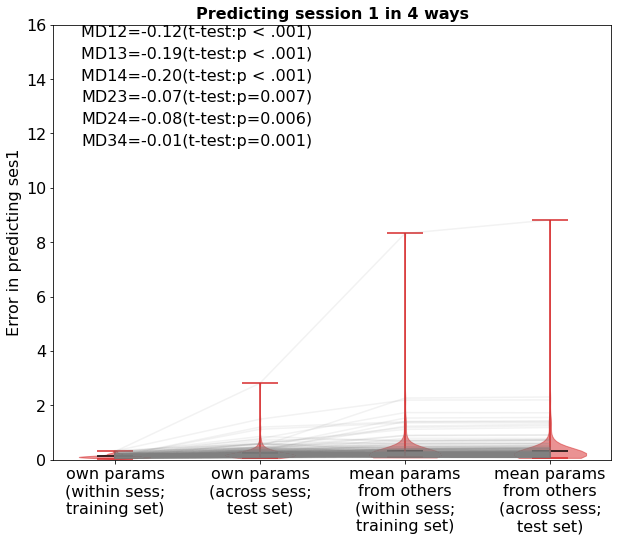

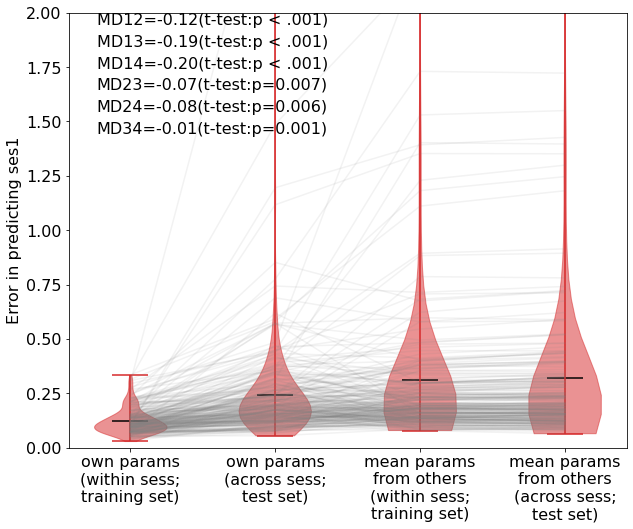

In [197]:
# plot_rmse_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2')
ylims = 0,16
title = 'Predicting session 1 in 4 ways'# es1_to_ses2_all4
ylabel = 'Error in predicting ses1'
flname = f'{rootfile_results}/predicting_session1'
plot_rmse_dist_4_plots(self_fit_ses1['RMSE'], cross_fit_ses2to1['RMSE'], self_fit_mean_ses1['RMSE'], cross_fit_mean_ses2_to_ses1['RMSE'], flname, title,ylabel,ylims)


ylims = 0,2
title = ''# es1_to_ses2_all4
ylabel = 'Error in predicting ses1'
flname = f'{rootfile_results}/predicting_session1_zoom'
plot_rmse_dist_4_plots(self_fit_ses1['RMSE'], cross_fit_ses2to1['RMSE'], self_fit_mean_ses1['RMSE'], cross_fit_mean_ses2_to_ses1['RMSE'], flname, title,ylabel,ylims)


0. param1:self_sameses,param2:self_altses,MD:-0.13,t=-6.12 (p < .001)
1. param1:self_sameses,param2:mean_sameses,MD:-0.21,t=-3.40 (p < .001)
2. param1:self_sameses,param2:mean_altses,MD:-0.21,t=-3.46 (p < .001)
3. param1:self_altses,param2:mean_sameses,MD:-0.08,t=-1.84 (p=0.07)
4. param1:self_altses,param2:mean_altses,MD:-0.07,t=-1.79 (p=0.07)
5. param1:mean_sameses,param2:mean_altses,MD:0.01,t=2.27 (p=0.02)
Self v mean:
0. param1:self_sameses,param2:self_altses,MD:-0.13,t=-6.12 (p < .001)
1. param1:self_sameses,param2:mean_sameses,MD:-0.21,t=-3.40 (p < .001)
2. param1:self_sameses,param2:mean_altses,MD:-0.21,t=-3.46 (p < .001)
3. param1:self_altses,param2:mean_sameses,MD:-0.08,t=-1.84 (p=0.07)
4. param1:self_altses,param2:mean_altses,MD:-0.07,t=-1.79 (p=0.07)
5. param1:mean_sameses,param2:mean_altses,MD:0.01,t=2.27 (p=0.02)
Self v mean:


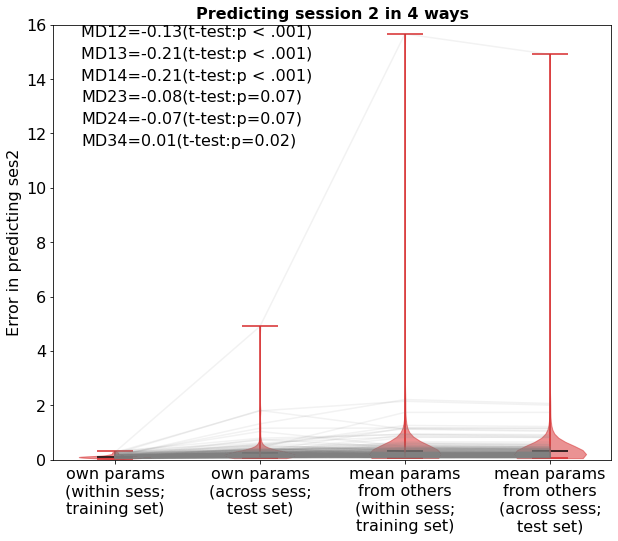

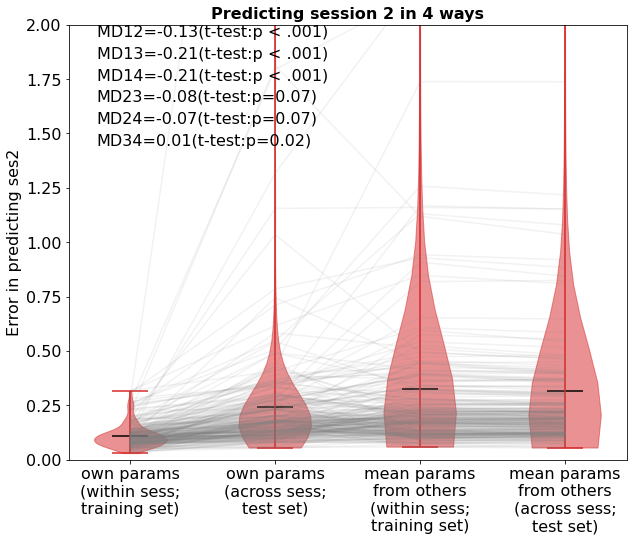

In [199]:
# plot_rmse_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2')
ylims = 0,16
title = 'Predicting session 2 in 4 ways'# es1_to_ses2_all4
flname = f'{rootfile_results}/Predicting_session2'
ylabel = 'Error in predicting ses2'
# plot_rmse_dist_4_plots(self_fit_ses1['RMSE'], cross_fit_ses2to1['RMSE'], self_fit_mean_ses1['RMSE'], cross_fit_mean_ses2_to_ses1['RMSE'], flname, title)
plot_rmse_dist_4_plots(self_fit_ses2['RMSE'], cross_fit_ses1to2['RMSE'], self_fit_mean_ses2['RMSE'], cross_fit_mean_ses1_to_ses2['RMSE'], flname, title,ylabel,ylims)


ylims = 0,2
title = 'Predicting session 2 in 4 ways'# es1_to_ses2_all4
flname = f'{rootfile_results}/Predicting_session2_zoom'
ylabel = 'Error in predicting ses2'
# plot_rmse_dist_4_plots(self_fit_ses1['RMSE'], cross_fit_ses2to1['RMSE'], self_fit_mean_ses1['RMSE'], cross_fit_mean_ses2_to_ses1['RMSE'], flname, title)
plot_rmse_dist_4_plots(self_fit_ses2['RMSE'], cross_fit_ses1to2['RMSE'], self_fit_mean_ses2['RMSE'], cross_fit_mean_ses1_to_ses2['RMSE'], flname, title,ylabel,ylims)


## comparision between fits for self vs mean & ind_min

In [146]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def plot_sep_dist(self, mean, other, ses_to_ses, remove_outlier):
    df_bootstrap = pd.DataFrame()
    df_bootstrap['self'] =[x for x in self if not np.isnan(x)]
    df_bootstrap['mean'] = [x for x in mean if not np.isnan(x)]
    df_bootstrap['other_ind_min'] = get_other_param(other, 'min')
    
    # trim the dataframe so that can exlude outliers
    if remove_outlier == True:
        df_bootstrap = remove_outliers(df_bootstrap, ['self', 'mean', 'other_ind_min'])

    ###### plot self vs. mean
    plt.figure(figsize=(10, 5))
    plt.boxplot([df_bootstrap['self'], df_bootstrap['mean']], positions=[0, 1])
    violin1 = sns.violinplot(data=df_bootstrap[['self', 'mean']], palette=['tab:red', 'tab:red'], inner=None)
    
    for collection in violin1.collections:
        collection.set_alpha(0.5)
        
    plt.scatter([0] * len(df_bootstrap['self']), df_bootstrap['self'], 
                color='tab:red', alpha = 0.1, label='self')
    plt.scatter([1] * len(df_bootstrap['mean']), df_bootstrap['mean'], 
                color='tab:red', alpha = 0.1, label='mean')
    min_len = min(len(df_bootstrap['self']), len(df_bootstrap['mean']))
    for i in range(min_len):
        plt.plot([0, 1], [df_bootstrap['self'].iloc[i], df_bootstrap['mean'].iloc[i]], 
                 color='gray', linestyle='--', alpha=0.1)
    
    plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs mean')
    t_stat, p_value = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
    plt.xticks([0, 1], ['self', 'mean'])
    plt.text(0.35, -0.02, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
    plt.show()
    
    
    
    ######## plot self vs. ind_min
    plt.figure(figsize=(10, 5))
    plt.boxplot([df_bootstrap['self'], df_bootstrap['other_ind_min']], positions=[0, 1])
    violin2 = sns.violinplot(data=df_bootstrap[['self', 'other_ind_min']], positions=[1,2], 
                   palette=['tab:red', 'tab:green'], inner=None)
    
    for collection in violin2.collections:
        collection.set_alpha(0.5)
    plt.scatter([0] * len(df_bootstrap['self']), df_bootstrap['self'], 
                color='tab:red', alpha = 0.1, label='self')
    plt.scatter([1] * len(df_bootstrap['other_ind_min']), df_bootstrap['other_ind_min'], 
                color='tab:green', alpha = 0.1, label='other_ind_min')
    min_len = min(len(df_bootstrap['self']), len(df_bootstrap['other_ind_min']))
    for i in range(min_len):
        plt.plot([0, 1], [df_bootstrap['self'].iloc[i], df_bootstrap['other_ind_min'].iloc[i]], 
                 color='gray', linestyle='--', alpha=0.1)
    
    
    plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs other_ind_min')
    t_stat, p_value = ttest_rel(df_bootstrap['self'], df_bootstrap['other_ind_min'])
    plt.xticks([0, 1], ['self', 'other_ind_min'])
    plt.text(0.35, -0.015, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
    plt.show()

### ses 1 to ses 1

In [ ]:
plot_sep_dist(self_rmse_ses1_t_ses1, mean_rmse_ses1_t_ses1, other_rmse_ses1_t_ses1, 'ses 1 to ses 1', False)

### ses 1 to ses 2

In [ ]:
plot_sep_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2', False)

### ses 2 to ses 2

In [ ]:
plot_sep_dist(self_rmse_ses2_t_ses2, mean_rmse_ses2_t_ses2, other_rmse_ses2_t_ses2, 'ses 2 to ses 2', False)

### ses 2 to ses 1

In [ ]:
plot_sep_dist(self_rmse_ses2_t_ses1, mean_rmse_ses2_t_ses1, other_rmse_ses2_t_ses1, 'ses 2 to ses 1', False)

## plot between self-->self to see if one session fit is better than another

In [ ]:
plt.figure(figsize=(10, 5))
self_rmse_ses1_t_ses2_clean = [x for x in self_rmse_ses1_t_ses2 if not np.isnan(x)]
self_rmse_ses2_t_ses1_clean = [x for x in self_rmse_ses2_t_ses1 if not np.isnan(x)]


plt.boxplot([self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean], positions=[0, 1])
violin = sns.violinplot([self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean], 
                        palette=['tab:red', 'tab:purple'], inner = None)

for col in violin.collections:
    col.set_alpha(0.5)

plt.scatter([0] * len(self_rmse_ses1_t_ses2_clean), self_rmse_ses1_t_ses2_clean, 
            color='tab:red', alpha = 0.1, label='ses1-ses2')
plt.scatter([1] * len(self_rmse_ses2_t_ses1_clean), self_rmse_ses2_t_ses1_clean, 
            color='tab:purple', alpha = 0.1, label='ses2-ses1')
min_len = min(len(self_rmse_ses1_t_ses2_clean), len(self_rmse_ses2_t_ses1_clean))
for i in range(min_len):
    plt.plot([0, 1], [self_rmse_ses1_t_ses2_clean[i], self_rmse_ses2_t_ses1_clean[i]], 
             color='gray', linestyle='--', alpha=0.1)

plt.title(f'Distribution of refitted rsme (ses1-ses2 vs ses2-ses1')

t_stat, p_value = ttest_rel(self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean)
plt.xticks([0, 1], ['ses1-ses2', 'ses2-ses1'])
plt.text(0.35, -0.02, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
plt.show()